# Survival Exploration & Analysis on Titanic

By Laxman Singh Tomar

----------

In this project, I'll analyze and cover the workflow of Kaggle's Dataset of Titanic passengers: https://www.kaggle.com/vikichocolate/titanic-machine-learning-from-disaster. I'll make use of Machine Learning Methods to predict the survivability of the passengers on the RMS Titanic.

---

# Outline

1. Introduction of Project 
    - 1.1 Project Objective
    - 1.2 Historical Context- The Sinking of the RMS Titanic
    
    
2.  Project Setup
    - 2.1 Importing the Libraries
    - 2.2 Importing the Data
    - 2.3 High Level Data Overview
    
    
3. Data Cleaning and Analysis
    - 3.1 Age & Sex
    - 3.2 Cabin
    - 3.3 Embarked
    - 3.4 Fare
    - 3.5 Sibsp & Parch
    - 3.6 Ticket Class
    - 3.7 Name & Title
    - 3.8 Ticket
    - 3.9 Concluding Everything
    
    
4. Modeling
    - 4.1 Preparing the Data
    - 4.2 Model Synopsis
    - 4.3 Decision Trees
    - 4.4 Adaboost
    - 4.5 Gradient Boost
    - 4.6 Random Forest
    - 4.7 SVM
    - 4.8 Ensemble Analysis & Prediction #1
    - 4.9 Pipeline Method & Prediction #2
    
    
5. Predictions
    - 5.1 Model Predictions
    - 5.2 Analysis
    - 5.3 Conclusion

# 1. Introduction of Project

## 1.1 Project Objective

To Predict survivability of passengers on Titanic using data available about Passengers.

------

## 1.2 Historical Context - The Sinking of the RMS Titanic

Built between 1909 and 1911, the RMS Titanic was the largest ship afloat at the time it entered service. It was the pinnacle of opulence, a luxury experience on a ship so large it was considered unsinkable. On the Titanic's maiden voyage, the ship struck an iceberg which caused severe damage to the ship's hull. Over the course of two hours and 40 minutes, the ship sank. Of the 2224 passengers on board, over 1500 perished. The Titanic was totally unprepared for such a disaster. The ship only had life boat capacity for approximately 1200 people, and many lifeboats were launched half full. The ship was largely segregated by economic class, with wealthier passengers enjoying higher decks and nicer facilities. The deck layout proved crucial during the sinking, as passnegers in the lower decks had less access to the life boats kept at the top of the ship. A disproportionate number of men perished, as a "Women and children first" evacuation rule was strictly enforced.

In this project, I'll analyze the data available on the passengers of the Titanic and their survival outcomes to build a model that will predict the survivability of a passenger based on factors such as age, sex, ticket class, cabin location, embarked etc.

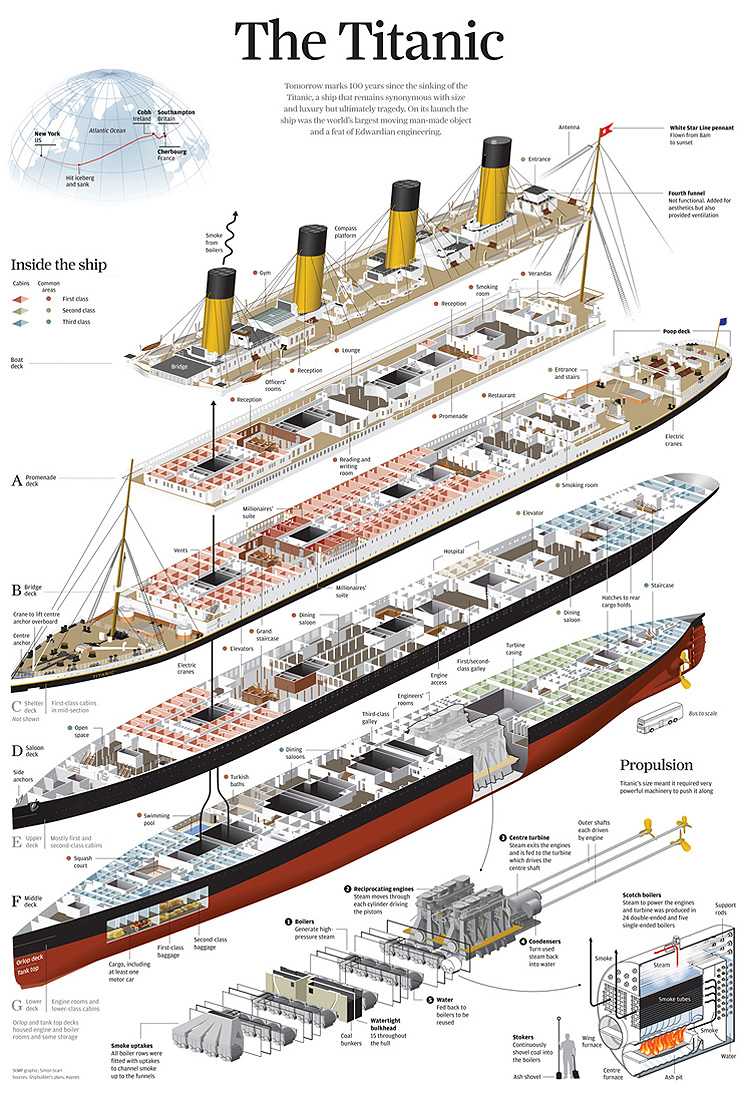

---

# 2. Project Setup

## 2.1 Importing the Libraries

I'm here using some of the standard machine learning libraries which are available in scikit-learn along with pandas and numpy for Data Analysis and Matplotlib for Data Visualization.

In [1]:
# Importing Libraries and Modules

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')


---

## 2.2 Importing Data

Data about Passengers is provided by Kaggle. It's available at: https://www.kaggle.com/vikichocolate/titanic-machine-learning-from-disaster.
The Python Pandas Package will be used to work with the data. We will start by importing the training and testing data into Pandas Dataframes. We will also occasionly combine these datasets to run certain operations simultaneously.

In [2]:
# Loading the Data
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

# Merging Datasets to clean simultaneously
full_set = train.append(test, ignore_index = True, sort = True)

---

## 2.3 High Level Data Overview

Pandas helps us to describe the datasets which answers many lingering questions. Let's analyze our data:

In [3]:
full_set.head(15)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


Let's see what are the features in our data; getting to know them will help me directly manipulating and analyzing them. Disintegrating the Data available:

- **Age** - age of the passenger, as an integer value. Missing values present
- **Cabin** - cabin where the passenger stayed. Many missing values
- **Embarked** - the port at which the passenger joined the Titanic
- **Fare** - how much the pasenger paid for a ticket
- **Name** - name of the passenger, usually with a title or prefix of some sort
- **Parch** - number of parents/children aboard
- **Pclass** - ticket class, with first class (1) being the most expensive
- **Sex** - male or female
- **SibSp** - number of siblings/spouses aboard
- **Survived** - did the passenger survive or not?
- **Ticket** - Ticket number for the passenger, in a variety of formats

### Features - Categorical or Numerical?

Upon looking at the data available, I found out that there are three types of features here. We have Categorical, Numerical and AlphaNumeric features.

- **Categorical** : These values classify the samples into sets of similar samples. They maybe nominal, ordinal or ratio based. Survived, Sex and Embarked are few of the examples.


- **Numerical** : These are real values which change from sample to sample. They maybe discrete and continuous. Age, Fare, SibSp, Parch are few of the examples.


- **Alphanumeric** : These are also known as mixed data type as they contain both numerical and alphabetical characters in them. Ticket is an example which can be seen in our data above. I still don't know whether it will be of some use but let's see.

Let's look at some high level statistics, co-relations and data quality.

Let's start off with analysis of the missing values present in our features:

In [4]:
full_set.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

Oooohhh! There are quite a few missing values. It's clearly visible that most of the data is missing from Cabin. Age has also a good number of missing values. The 418 values being showed in Survived - this is just the test data for the problem. Remember how I merged both training and testing data to clean them simultaneously. There are only a handful of values missing from Embarked and Fare features.

Now let's look at some high level statistics on the numerical data:

In [5]:
# Making a set without passenger ID, makes some visualizations easier to construct:
data = full_set.copy()
data = data.drop('PassengerId',1)

In [6]:
data.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


Let's gather some useful insights from the description above:

- Total samples are 891 or 40% approx. of the actual number of passengers who boarded the Titanic (2,224).



- The age of average passenger was about 30. The minimum age is 0.17 - assuming it's measured in months. There were many families with small children onboard.


- Fares varied significantly, from as low as a few dollars upto \\$512 - that'll be around a five figure ticket these days. There's another notable thing here : mean is of \\$33 and the 50th percentile is \\$14. It shows that those belonging from upper class are dragging the average up.



- From the data it looks like more than 75% of the passengers are travelling alone, or with a single other family member. On the higher outlier side, some large families were also on the Titanic.



- Class Values are computed from a set of three classes which shouldn't be looked deeply as of now; we'll delve into it later. But one thing to notice here is that "mean" of Pclass being 2.29 tells us that most of the passengers were of class 2 or class 3, rather than expensive first class.



- Survived is a categorical feature. 38% average survival, is surely not an impressive figure.

Let's also visit categorical data for vital statistical figures:

In [7]:
data.describe(include = ['O'])

,Cabin,Embarked,Name,Sex,Ticket
count,295,1307,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Connolly, Miss. Kate",male,CA. 2343
freq,6,914,2,843,11


Let's gather some useful insights from the description above:

- Names are unique across the dataset; only 2 are exceptions.


- Sex feature has 2 possible values with 65% males (freq = 843/count = 1309).


- Cabin values has several duplicates implying that several passengers shared a cabin.


- Embarked has 3 possible values, where port S dominates the rest.


- Ticket features has high ratio of duplicate values i.e. 29%.

Let's see some high level corelations in the data:

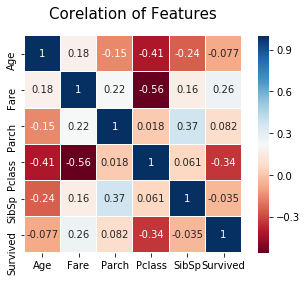

In [8]:
plt.clf()
colormap = plt.cm.RdBu
corr = data.corr()
plt.title('Corelation of Features', y = 1.05, size = 15 )
sns.heatmap(corr,linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Well nothing looks too warysome here, but still few interesting things to take a note of. Pclass has a strong negative co-relation with Age, Fare and Survived. Until now, we've considered Pclass as a numerical feature whose value ranges from 1 to 3. What it implies? Age, Fare and Survival increase with decreasing Pclass. Let's put it another way, people in first class paid more, were generally older, and had a better chance of survival.

This make quite of a sense now. As first class tickets were more expensive, people who could have afford first class would be older. They would be in one of the top decks and henceforth closest to the life boats.


Let's take a closer look at the data...

---

# 3. Data Cleaning & Analysis

## 3.1 Age & Sex

First of all, we need to have a some sort of idea of the demographics on the Titanic. Let's take a closer look at the distribution of Age and Sex with respect to Survivability.

<Figure size 432x288 with 0 Axes>

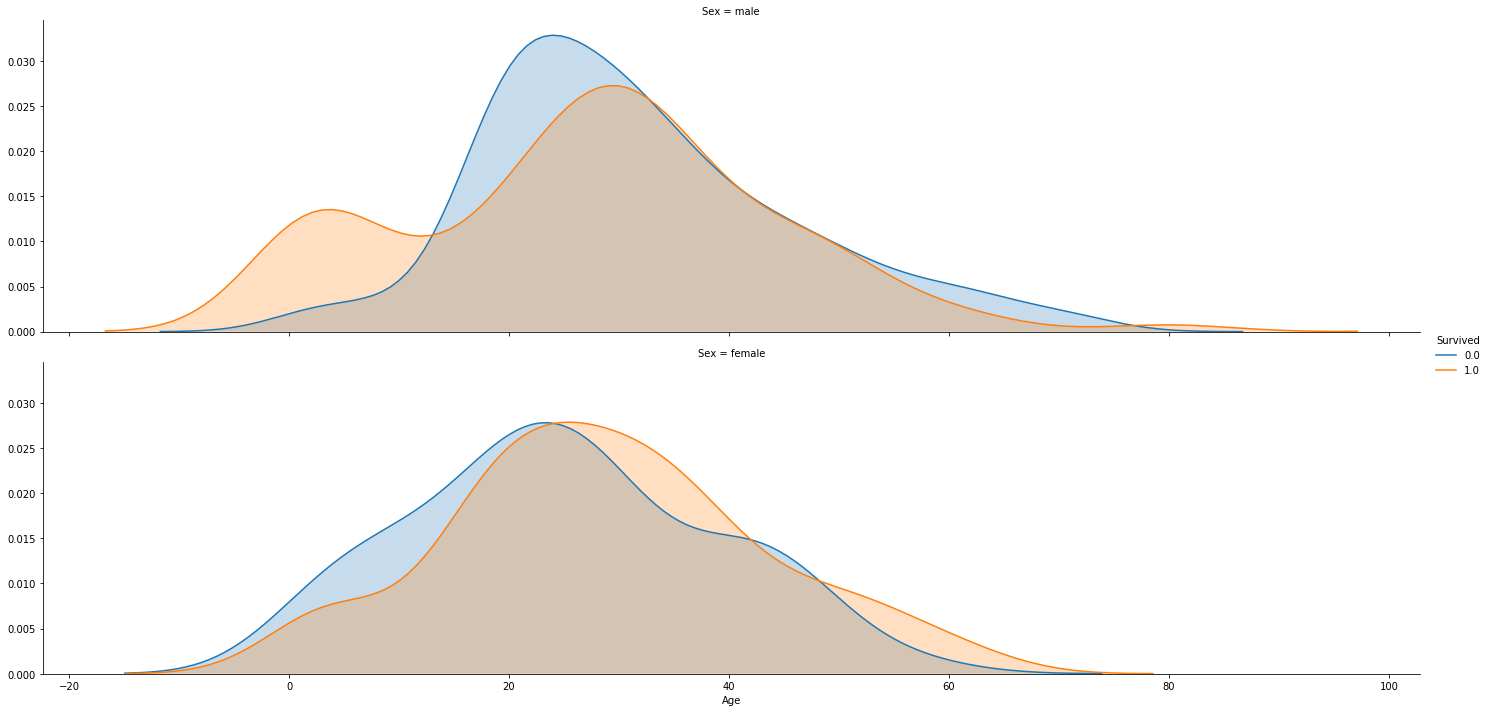

In [9]:
plt.clf()

facet = sns.FacetGrid(full_set, hue='Survived', aspect=4, row='Sex', height=5)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.add_legend()

plt.show()

Looking at it in a glimpse; this plot seems weird, because the distribution of Age values(all positive numbers) drifts into negative numbers. This might be possible due to kdeplot estimating probability densities for the Age values close to zero. Remember how very young children were also onboard.


Well, looking at the shapes of these curves, and keeping in head the "Women and Children first" evacuation policy of RMS Titanic; if we closely see the male survivors there's a distinct peak of young men who survived the sinking of the ship - children being evacuated. The second peak which happens to be is in the older men. Meanwhile, if you'd watch, peak of male fatalities looks younger.

As compared to the Male survial curves, Female Survival curves are quite similar in nature. Possibly, the "Women and Children first" policy is more related to getting a lifeboat rather than Age.


Now, putting in both Sex and Survival heads up against each other would give us insight about effect of prioritizing women and children first:

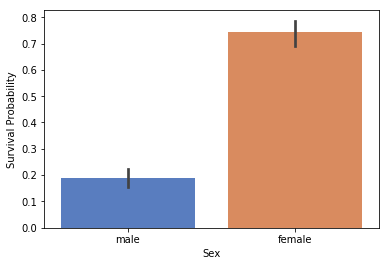

In [10]:
plt.clf()
g = sns.barplot(x="Sex",y="Survived",data=full_set, palette = 'muted')
g = g.set_ylabel("Survival Probability")

Remember how Age data had quite a few missing values. We got to clean the data now. All the missing NaN values for the Age will be filled in with the mean Age. Sex is a categorical feature; it'll be made into binary as it can have only 2 possible values: male = 0  and female = 1.

In [11]:
# Replacing the NaN or missing values in Age with average Age

age_final = pd.DataFrame()
age_final['Age'] = full_set.Age.fillna(full_set.Age.mean())
age_final.describe()

,Age
count,1309.000000
mean,29.881138
std,12.883193
min,0.170000
25%,22.000000
50%,29.881138
75%,35.000000
max,80.000000


In [12]:
sex_final = pd.DataFrame()
sex_final['Sex'] = full_set['Sex']
sex_final = sex_final.replace({'male' : 0}).replace({'female':1})

sex_final.describe()

,Sex
count,1309.000000
mean,0.355997
std,0.478997
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


---

## 3.2 Cabin

Now I'll move to see how Cabin relates to Survivability. There are different values in Cabin. How to deal with this? It'll be better to just watch out for deck of the ship a cabin is in. If you'd see closely the Titanic Schematic Diagram above, deck can act as an alternative for how deep a person was in the ship. Also, we won't forget about the huge number of values missing from Cabin data. As I have no idea as of now, I'll assign all the missing values "Cabin L". L just goes with first letter of my name; nothing too mind boggling.

In [13]:
cabin_df = pd.DataFrame()
cabin_df['Deck'] = full_set.Cabin.fillna('L')
cabin_df['Deck'] = [cabin_df['Deck'] [i][0] for i in range(len(cabin_df['Deck']))]
cabin_df['Deck'].value_counts()

L    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Deck, dtype: int64

It's pretty evident that Cabin L makes up most of our dataset. This variable may or may not be helpful for us. There's only one way to figure this out; let's see if it corelates with Survivability.

<Figure size 432x288 with 0 Axes>

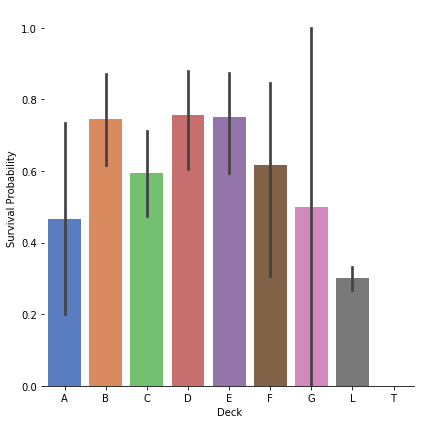

In [14]:
plt.clf()
cabin_df['Survived'] = full_set.Survived
g = sns.factorplot(x="Deck", y="Survived", data=cabin_df.sort_values(by='Deck'), kind="bar", height = 6 , palette = "muted", row_order=['T','A','B','C','D','E','F','G','L'])
g.despine(left=True)
g = g.set_ylabels("Survival Probability")

Well, here it doesn't appear to be a strong corelation. From decks A-G, when we consider the error bars on the plot, there isn't much of a sifnificant difference between them. Also, it looks like decks B, D and E have higher survival probability as compared to other decks. Their values are still within margin of error of other decks. Considering the values being held by Cabin L, it's surprising to see such a tight distribution where probability of survival is less from almost every other deck.


So, to deal with Cabin Data later in analysis, I'm going to use numerical scale for Cabin Data. It will go something like this: where deck G(the lowest) has the value of 0, and deck T (the highest) has a value of 7. Our new Cabin L will be assigned a median value of 3.5. This measure depicts how deep in the ship a passenger was based on deck value. 

In [15]:
# New Cabin Values - L gets an average value of decks
cabin_values = {'G':0., 'F':1., 'E':2., 'D':3., 'C':4., 'B':5., 'A':6., 'T':7., 'L':3.5}

cabin_final = pd.DataFrame()
cabin_final['Cabin'] = [cabin_values[i] for i in cabin_df['Deck']]

scaler = preprocessing.MinMaxScaler()
scaled_array = scaler.fit_transform(cabin_final['Cabin'].values.astype(float).reshape(-1,1))
cabin_final['Cabin'] = scaled_array
cabin_final.describe()

,Cabin
count,1309.000000
mean,0.505293
std,0.097874
min,0.000000
25%,0.500000
50%,0.500000
75%,0.500000
max,1.000000


---

## 3.3 Embarked

This data shows what port each passenger boarded te RMS Titanic at. First, let's see the data:

In [16]:
print(full_set['Embarked'].value_counts())
print('\n', full_set['Embarked'].describe())
print('\n', full_set['Embarked'].isnull().sum())

S    914
C    270
Q    123
Name: Embarked, dtype: int64

 count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

 2


Well, most of the data is present. If you see there are two missing values present, but as compared to that of Cabin Data; it's much more complete. Let's put Survivability heads up against Ports.

<Figure size 432x288 with 0 Axes>

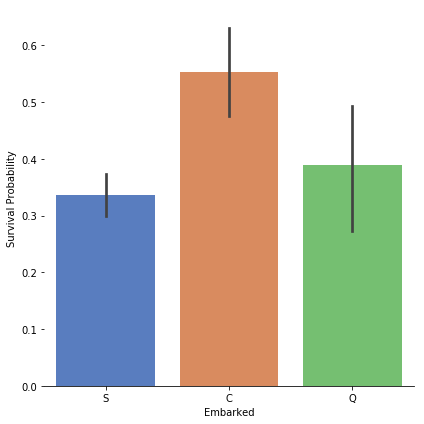

In [17]:
# Looking at Survivability and Embarked Status

plt.clf()
c = sns.factorplot(x="Embarked", y = "Survived", data = train, kind = 'bar', height = 6, palette = 'muted')
c.despine(left = True)
c = c.set_ylabels("Survival Probability")

Well, it seems like there is a corelation between port of embarkation and survivability. It's clearly visible that passengers boarding at the port of Cherbourg have higher probability of Survival. But still drawing inferences from this, doesn't seem to be just right, as boarding Titanic from a specific port alone shouldn't have a considerable effect on its own. Probably there's some sort of a relationship between port and other factors like Fare, Pclass, or Cabin that will explain this corelation.

<Figure size 432x288 with 0 Axes>

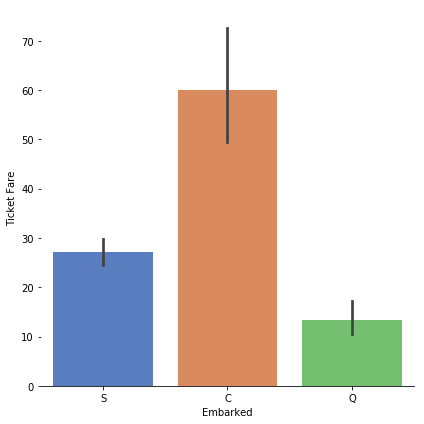

In [18]:
# Looking at Ticket Fare and Embarked Status

plt.clf()
c = sns.factorplot(x = "Embarked", y = "Fare", data = train, kind = "bar", height = 6, palette = "muted")
c.despine(left = True)
c = c.set_ylabels("Ticket Fare")

Yeah, as I had thought. Port C passengers paid significantly more for their tickets and likely had higher class, resultingly they received higher deck cabins.

<Figure size 432x288 with 0 Axes>

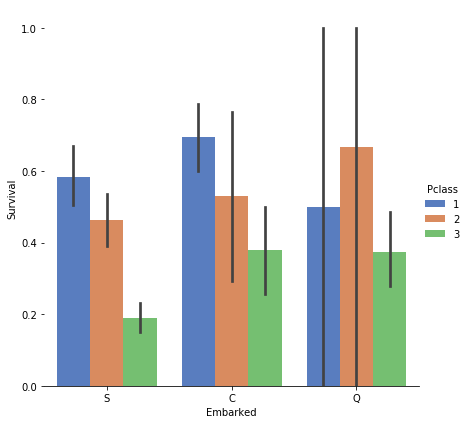

In [19]:
# Looking at Survival and Embarked Status alongwith Class

plt.clf()
c = sns.factorplot(x = "Embarked", y = "Survived", data = train, kind = "bar", height = 6, palette = "muted", hue = 'Pclass')
c.despine(left = True)
c = c.set_ylabels("Survival")

As I've reduced the abstraction from Embarked Data to PClass and Survivbility here, we can see that Port C has higher survival chance than passenger from other ports. But what if the aggregate survival chance was brought down by second and third class passengers for Port S and Port Q? Only one thing to get to know it: what's the actual count of the passengers? 

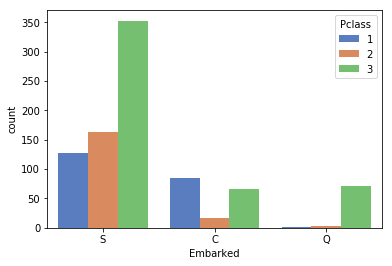

In [20]:
# Looking at the count of the passengers and Embarked Status alongwith Pclass

plt.clf()
c = sns.countplot(x = "Embarked", data = train, palette = "muted", hue = 'Pclass')
plt.show()

Voila! It's starting to make sense now. Port C and Port Q have a much lower number of passengers than that of Port S. The differences that we observed in previous visualizations may just be due to smaller sample size. From the visualization:

- Port Q passengers were mostly third class, lower deck passengers which explains low aggregate survival of Port Q passengers.


- Port C has much higher proportion of first class as compared to Port S which has larger number of third class passengers. The higher aggregate survival in Port C is maybe just due to a relative overrepsentation of first class passengers. 

And how to manage the data? The two missing values will be in as Port L. Port data is discrete, so let's separate it into four categories(S, C, Q, X) with binary outcomes.

In [21]:
# Embarked 

embarked_final = pd.DataFrame()
embarked_final['Embarked'] = full_set.Embarked.fillna('L')
embarked_final = pd.get_dummies([i for i in embarked_final['Embarked']], prefix = 'Embarked')
embarked_final.head()

,Embarked_C,Embarked_L,Embarked_Q,Embarked_S
0,0,0,0,1
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


---

## Fare

It's time to revisit our data and look for passenger Fare. Up till now, we've some intuition about how Fare may relate to relate to other features like Deck, Ticket Class and Survival. It's pretty evident now that Costlier Ticket get better Class Cabins, closer to the top of the ship with better access to lifeboats. Let's take a look:

In [22]:
# Fare Data
print(full_set['Fare'].describe())

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64


<Figure size 432x288 with 0 Axes>

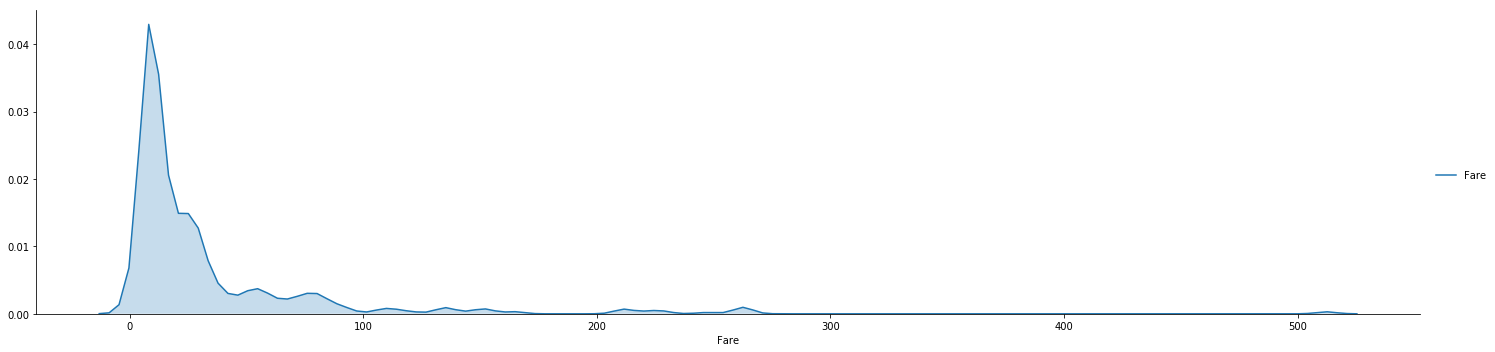

In [23]:
plt.clf()

facet = sns.FacetGrid(full_set, aspect = 4, height = 5)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.add_legend()

Okay, the fare distribution is quite interesting. Most ticket prices up to the 75th percentile are less than \\$50, but only a small number of wealthy people could afford expensive tickets as expensive as \\$512.

<Figure size 432x288 with 0 Axes>

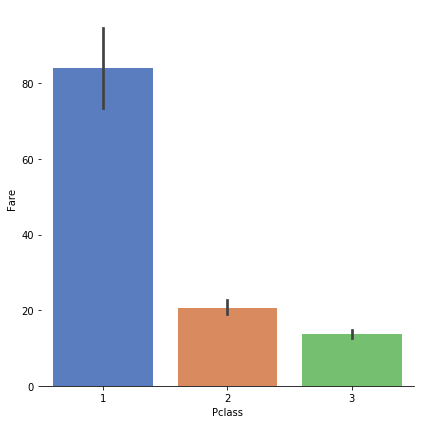

In [24]:
# Looking at Ticket Fare & Embarked Status alongwith Pclass

plt.clf()
g = sns.factorplot(x="Pclass",y="Fare",data=train, kind="bar", height = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Fare")

This isn't something unusual. We've been seeing from quite a while now, first class tickets are much more expensive.

<Figure size 432x288 with 0 Axes>

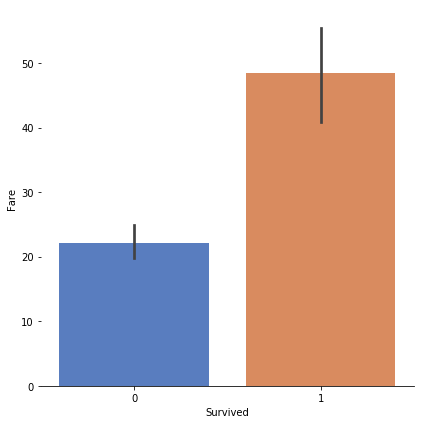

In [25]:
# Looking at Ticket Fare and Survivability

plt.clf()
c = sns.factorplot(x = 'Survived', y = 'Fare', data = train, kind = 'bar', height = 6, palette = "muted")
c.despine(left = True)
c = c.set_ylabels("Fare")

<Figure size 432x288 with 0 Axes>

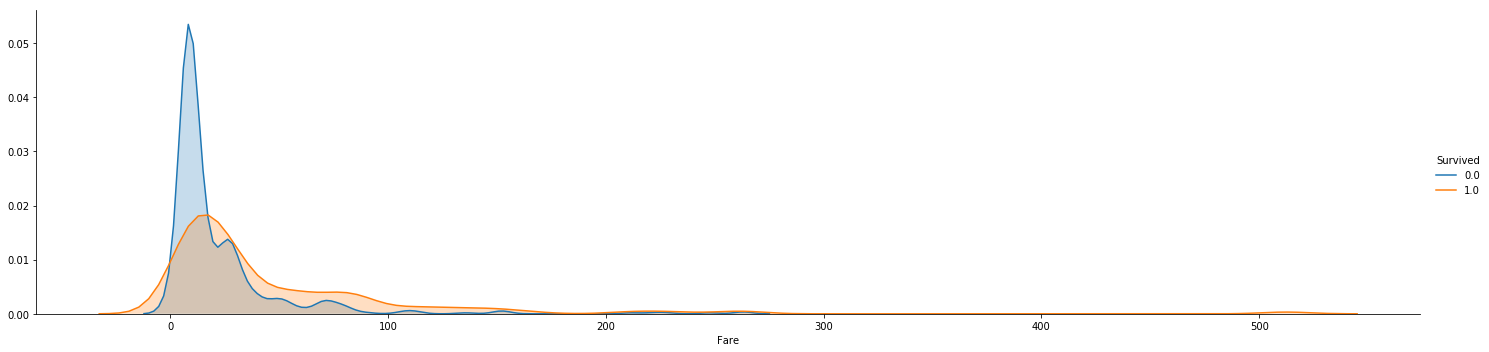

In [26]:
plt.clf()

facet = sns.FacetGrid(full_set, aspect = 4, hue = 'Survived', height = 5)
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.add_legend()

We've seen that Pricier Tickets have, on average, better survivability.

Okay, not it's time to deal with the null values by putting in average ticket price, similar to what we did with Age.

In [27]:
full_set['Fare'].isnull().count()

1309

In [28]:
fare_final = pd.DataFrame()
fare_final['Fare'] = full_set.Fare.fillna(full_set.Fare.mean())

fare_final.describe()

,Fare
count,1309.000000
mean,33.295479
std,51.738879
min,0.000000
25%,7.895800
50%,14.454200
75%,31.275000
max,512.329200


---

## 3.5 Sibsp & Parch

Both of these features refer to the family size of the passenger on board, so for the sake of convenience let's wrap them up into a single feature:

In [29]:
family = pd.DataFrame()
family['Family_Size'] = full_set['Parch'] + full_set['SibSp'] + 1

print(family['Family_Size'].value_counts())
print('\n', family['Family_Size'].describe())

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family_Size, dtype: int64

 count    1309.000000
mean        1.883881
std         1.583639
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        11.000000
Name: Family_Size, dtype: float64


<Figure size 432x288 with 0 Axes>

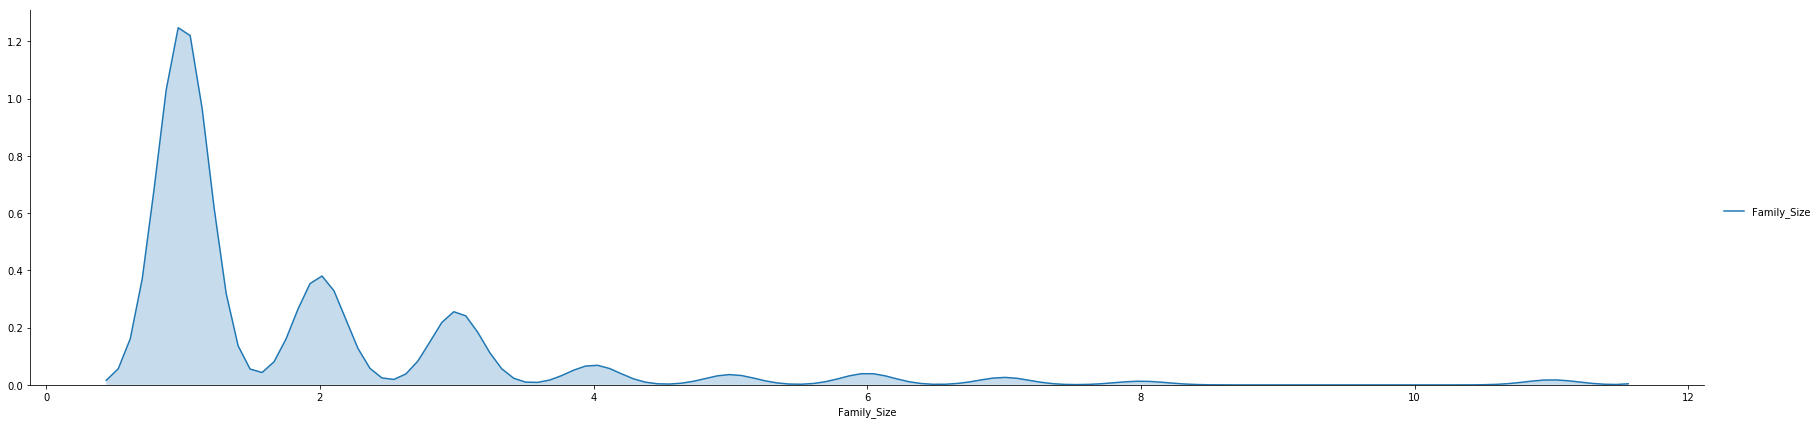

In [30]:
plt.clf()

facet = sns.FacetGrid(family, aspect = 4, height = 6)
facet.map(sns.kdeplot, 'Family_Size', shade = True)
facet.add_legend()

Looking at the data distribution, it looks like most passengers travelled alone but there were also few large families.

Does family size relate to survival anyhow?

<Figure size 432x288 with 0 Axes>

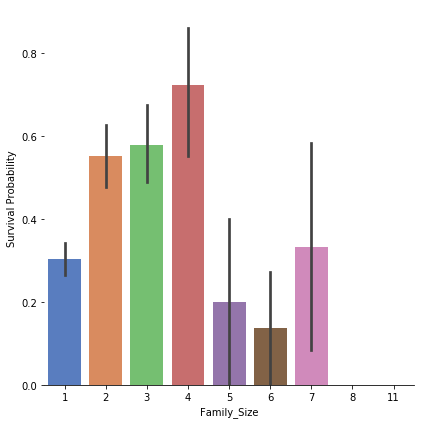

In [31]:
plt.clf()

family_plt = pd.DataFrame()
family_plt['Family_Size'] = family['Family_Size'][:891]
family_plt['Survived'] = train['Survived']

plt.clf()
c = sns.factorplot(x = "Family_Size", y = 'Survived', data = family_plt, kind = "bar", height = 6, palette = "muted")
c.despine(left = True)
c = c.set_ylabels("Survival Probability")

Looking at this visualization:

- Families having 2-4 members show the best survival rate.


- People who were travelling alone have a lower survival rate, likely due to priorities in evacuation.


- Larger families too couldn't find themselves in a good position, due to logistical challenges in evacuating.

---

## 3.6 Ticket Class

We've already looked at Ticket Class getting heads up against Fare and Embarked Port. But it won't be bad to have a direct look at it:

In [32]:
print(full_set['Pclass'].value_counts())
print('\n', full_set['Pclass'].describe())

3    709
1    323
2    277
Name: Pclass, dtype: int64

 count    1309.000000
mean        2.294882
std         0.837836
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: Pclass, dtype: float64


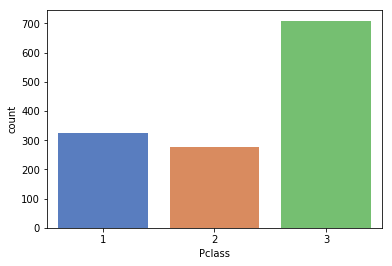

In [33]:
# Looking at the number of the passengers in a given class

plt.clf()
c = sns.countplot(x = "Pclass", data = full_set, palette = "muted")

<Figure size 432x288 with 0 Axes>

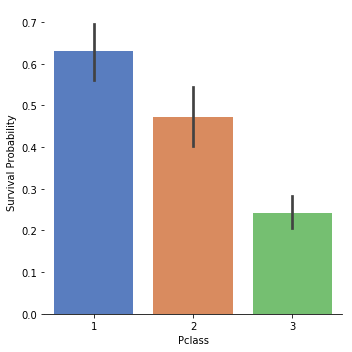

In [34]:
# Looking at the Ticket Class against survival

plt.clf()
c = sns.factorplot(x = "Pclass", y = "Survived", data = train, kind = 'bar', palette = 'muted')
c.despine(left = True)
c = c.set_ylabels("Survival Probability")

Remember how most of the people belonged to class 3. Also third class has the lowest survivability.

Pclass will be split into 3 binary outcomes, one for each class:

In [35]:
# Treating Pclass like Ports of Embarkation

Pclass_final = pd.DataFrame()
Pclass_final['Pclass'] = full_set.Pclass
Pclass_final = pd.get_dummies([i for i in Pclass_final['Pclass']], prefix ='Class')

Pclass_final.head()

,Class_1,Class_2,Class_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


## 3.7 Name & Title

To get a better idea of passenger's demographics, Name data will be converted into the Title of the person.

- Titles Used:
    - Officer - Officer or crewmember of the ship
    - Mr - Adult Men
    - Master - Young Men
    - Mrs - Adult Women
    - Miss - Young Women
    - Royalty M - High Class Men
    - Royalty F - High Class Women

In [36]:
title = pd.DataFrame()
title[ 'Title' ] = full_set[ 'Name' ].map( lambda name: name.split(',')[1].split( '.' )[0].strip() )

Title_Dictionary = {
                    "Capt"         : "Officer",
                    "Col"          : "Officer",
                    "Major"        : "Officer",
                    "Dr"           : "Officer",
                    "Rev"          : "Officer",
                    "Jonkheer"     : "Royalty M",
                    "Don"          : "Royalty M",
                    "Sir"          : "Royalty M",
                    "the Countess" : "Royalty F",
                    "Dona"         : "Royalty F",
                    "Lady"         : "Royalty F",
                    "Mr"           : "Mr",
                    "Master"       : "Master",
                    "Mme"          : "Mrs",
                    "Ms"           : "Mrs",
                    "Mrs"          : "Mrs",
                    "Mlle"         : "Miss",
                    "Miss"         : "Miss"
                    }

title[ 'Title' ] = title.Title.map( Title_Dictionary )
title[ 'Title' ].value_counts()
title = pd.get_dummies( title.Title )

title.head()

,Master,Miss,Mr,Mrs,Officer,Royalty F,Royalty M
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0


Let's see how survivability stands against our Titles

<Figure size 432x288 with 0 Axes>

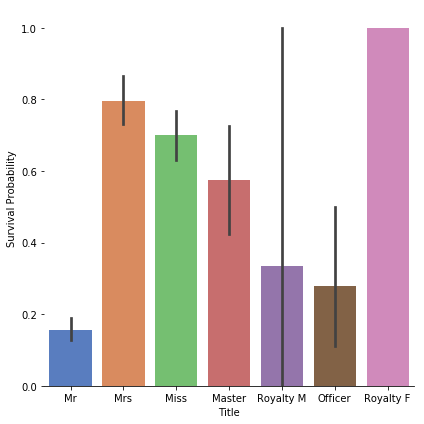

In [37]:
title_plot = pd.DataFrame()

title_plot['Title'] = train[ 'Name' ].map( lambda name: name.split( ',' )[1].split( '.')[0].strip() )
title_plot['Title'] = title_plot.Title.map( Title_Dictionary )

title_plot['Survived'] = train['Survived']

plt.clf()
c = sns.factorplot( x = "Title", y = "Survived", data = title_plot, kind = "bar", size = 6, palette = "muted")
c.despine(left = True)
c = c.set_ylabels("Survival Probability")

No Surprise at all ! From the Visualization:

- Adult Men and Officers have lowest survivability ; remember the evacuation policy!


- High Class Women have the highest survivability followed by Average young women, adult women and average young men.


- Royalty M has better survivability as compared to the average men, and that too with a high variance.

---

## 3.8 Ticket

Probably the most difficult feature to deal with. There are a huge number of ticket formats, and extracting information out of them is a bit problematic. I don't think it adds much value to our model as it adds a huge number of feature without adding much information; provided the fact that most of the information is missing. And at the end, I won;t use ticket information in modelling. Nonetheless, let's give a shot in an attempt to manage ticket information:

In [38]:
# Extracting prefix from the ticket data

ticket_final = pd.DataFrame()

ticket = []
for i in list(full_set['Ticket']):
    if not i.isdigit():
        ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0])        
    else:
        ticket.append('L')
            
ticket_final['Ticket'] = ticket
ticket_final['Ticket'].value_counts()

L          957
PC          92
CA          68
A5          28
SOTONOQ     24
WC          15
SCPARIS     14
STONO       14
A4          10
FCC          9
C            8
SOC          8
SOPP         7
STONO2       7
SCAH         5
SCParis      5
WEP          4
PP           4
LINE         4
FC           3
SOTONO2      3
SC           2
PPP          2
SCA4         2
SWPP         2
AQ3          1
Fa           1
CASOTON      1
SCOW         1
LP           1
SOP          1
AS           1
SP           1
STONOQ       1
SCA3         1
A            1
AQ4          1
Name: Ticket, dtype: int64

<Figure size 432x288 with 0 Axes>

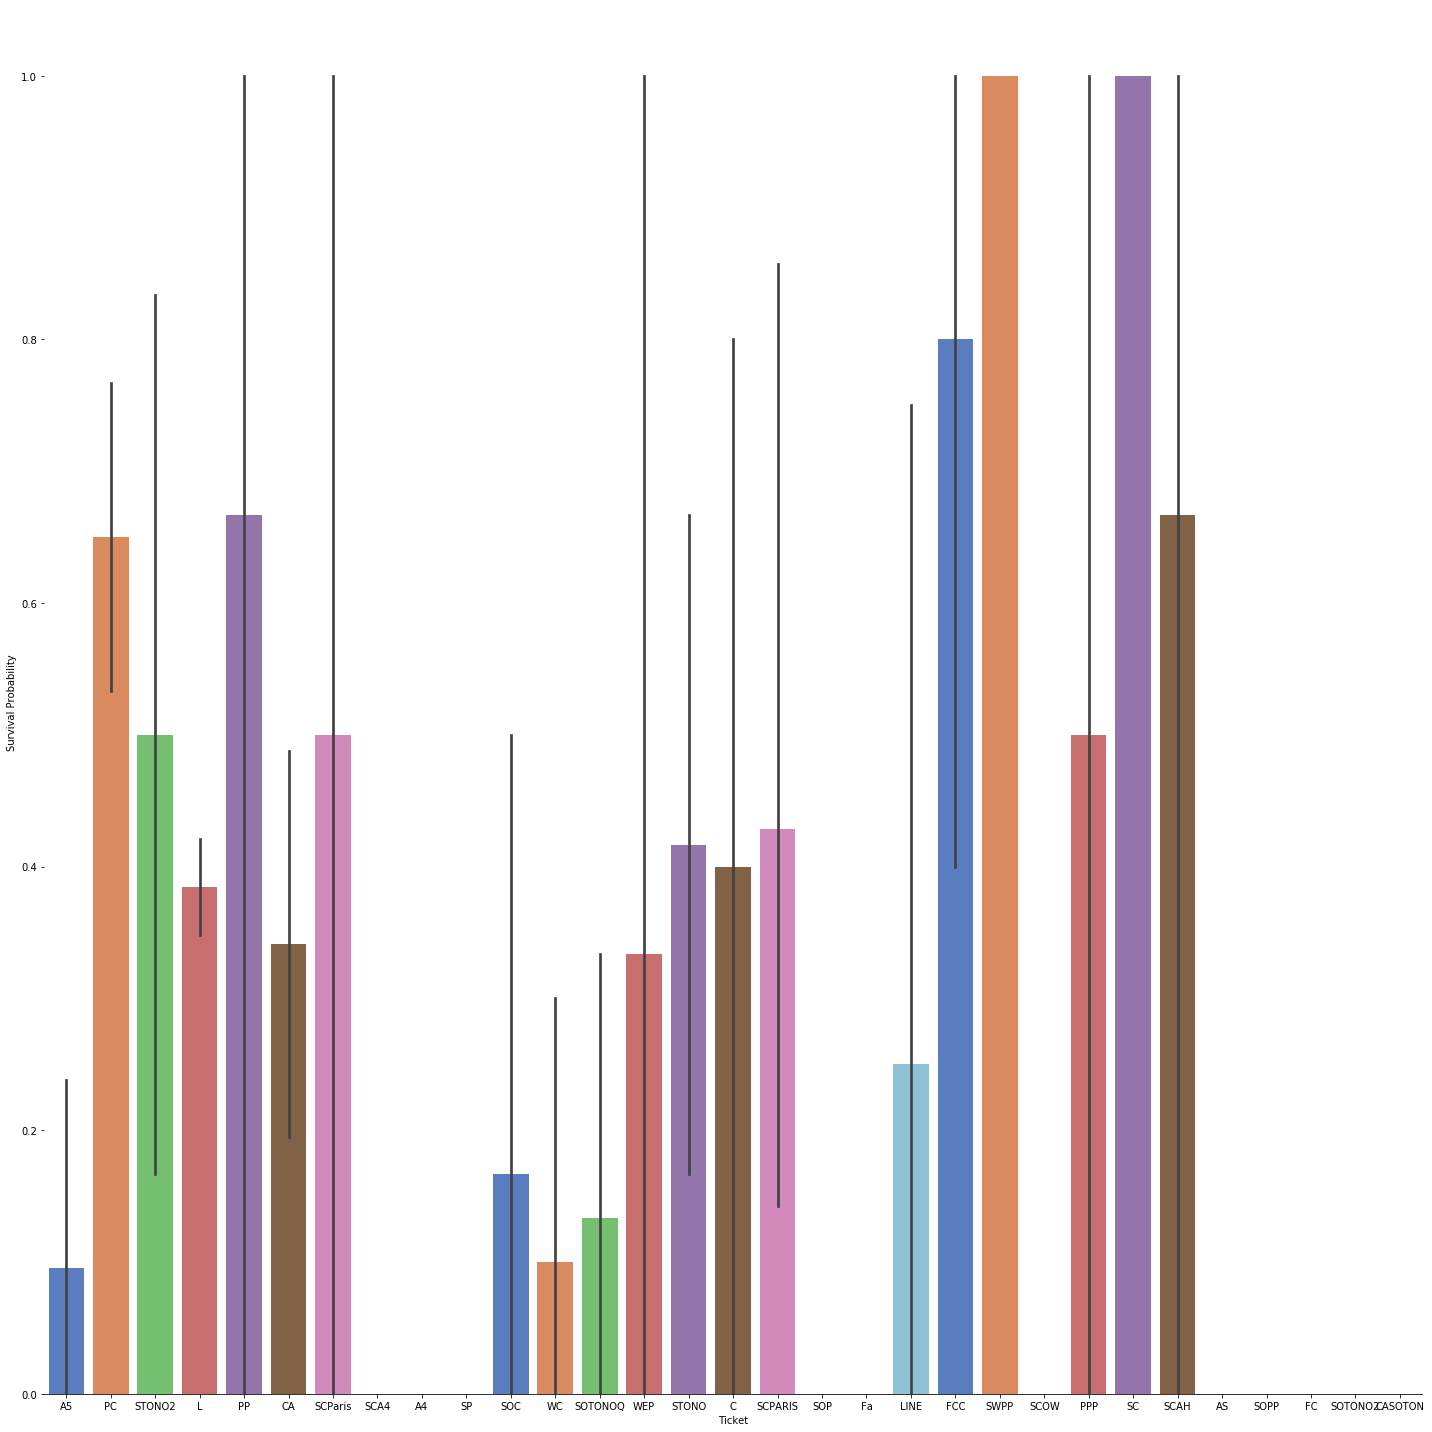

In [39]:
ticket_plot = pd.DataFrame()
ticket_plot['Ticket'] = ticket_final['Ticket'][:891]
ticket_plot['Survived'] = train['Survived']

plt.clf()
c = sns.factorplot(x = "Ticket", y = "Survived", data = ticket_plot, kind = "bar", height = 20, palette = "muted")
c.despine(left = True)
c = c.set_ylabels("Survival Probability")

In [40]:
ticket = pd.get_dummies(ticket_final['Ticket'], prefix = 'Ticket')
ticket['Survived'] = full_set['Survived']

ticket.shape
ticket.head()

,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_L,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Survived
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [41]:
ticket.describe()

,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_L,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,0.000764,0.007639,0.021390,0.000764,0.000764,0.000764,0.006112,0.051948,0.000764,0.002292,0.006875,0.000764,0.731092,0.003056,0.000764,0.070283,0.003056,0.001528,0.001528,0.000764,0.001528,0.003820,0.000764,0.010695,0.003820,0.006112,0.000764,0.005348,0.002292,0.018335,0.000764,0.010695,0.005348,0.000764,0.001528,0.011459,0.003056,0.383838
std,0.027639,0.087103,0.144737,0.027639,0.027639,0.027639,0.077967,0.222007,0.027639,0.047836,0.082665,0.027639,0.443561,0.055216,0.027639,0.255720,0.055216,0.039073,0.039073,0.027639,0.039073,0.061709,0.027639,0.102902,0.061709,0.077967,0.027639,0.072959,0.047836,0.134210,0.027639,0.102902,0.072959,0.027639,0.039073,0.106473,0.055216,0.486592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
ticket.corr()['Survived']

Ticket_A               NaN
Ticket_A4        -0.070234
Ticket_A5        -0.092199
Ticket_AQ3             NaN
Ticket_AQ4             NaN
Ticket_AS        -0.026456
Ticket_C          0.002496
Ticket_CA        -0.019137
Ticket_CASOTON   -0.026456
Ticket_FC        -0.026456
Ticket_FCC        0.064285
Ticket_Fa        -0.026456
Ticket_L          0.001492
Ticket_LINE      -0.018481
Ticket_LP              NaN
Ticket_PC         0.147062
Ticket_PP         0.033803
Ticket_PPP        0.011329
Ticket_SC         0.042470
Ticket_SCA3            NaN
Ticket_SCA4      -0.026456
Ticket_SCAH       0.033803
Ticket_SCOW      -0.026456
Ticket_SCPARIS    0.008185
Ticket_SCParis    0.016040
Ticket_SOC       -0.036769
Ticket_SOP       -0.026456
Ticket_SOPP      -0.045876
Ticket_SOTONO2   -0.037436
Ticket_SOTONOQ   -0.067404
Ticket_SP        -0.026456
Ticket_STONO      0.007887
Ticket_STONO2     0.019667
Ticket_STONOQ          NaN
Ticket_SWPP       0.060095
Ticket_WC        -0.062182
Ticket_WEP       -0.006036
S

Well none of the ticket feature values seem to show any real correlation between ticket type and survival. So there is no point in breaking them up into binary variables. Henceforth, this just adds noise to the data.

## 3.9 Concluding Everything

This is what we were waiting for. I will string back together the cleaned data and would look at some high level correlations with the data we've just cleaned.

In [43]:
full_final = pd.concat([age_final, cabin_final, embarked_final, fare_final, title, family, Pclass_final, sex_final, full_set['Survived']],axis = 1)

full_final.head()

,Age,Cabin,Embarked_C,Embarked_L,Embarked_Q,Embarked_S,Fare,Master,Miss,Mr,Mrs,Officer,Royalty F,Royalty M,Family_Size,Class_1,Class_2,Class_3,Sex,Survived
0,22.0,0.500000,0,0,0,1,7.2500,0,0,1,0,0,0,0,2,0,0,1,0,0.0
1,38.0,0.571429,1,0,0,0,71.2833,0,0,0,1,0,0,0,2,1,0,0,1,1.0
2,26.0,0.500000,0,0,0,1,7.9250,0,1,0,0,0,0,0,1,0,0,1,1,1.0
3,35.0,0.571429,0,0,0,1,53.1000,0,0,0,1,0,0,0,2,1,0,0,1,1.0
4,35.0,0.500000,0,0,0,1,8.0500,0,0,1,0,0,0,0,1,0,0,1,0,0.0


In [44]:
full_final.corr()['Survived']

Age           -0.070323
Cabin          0.001600
Embarked_C     0.168240
Embarked_L     0.060095
Embarked_Q     0.003650
Embarked_S    -0.155660
Fare           0.257307
Master         0.085221
Miss           0.332795
Mr            -0.549199
Mrs            0.344935
Officer       -0.031316
Royalty F      0.060095
Royalty M     -0.006036
Family_Size    0.016639
Class_1        0.285904
Class_2        0.093349
Class_3       -0.322308
Sex            0.543351
Survived       1.000000
Name: Survived, dtype: float64

<Figure size 432x288 with 0 Axes>

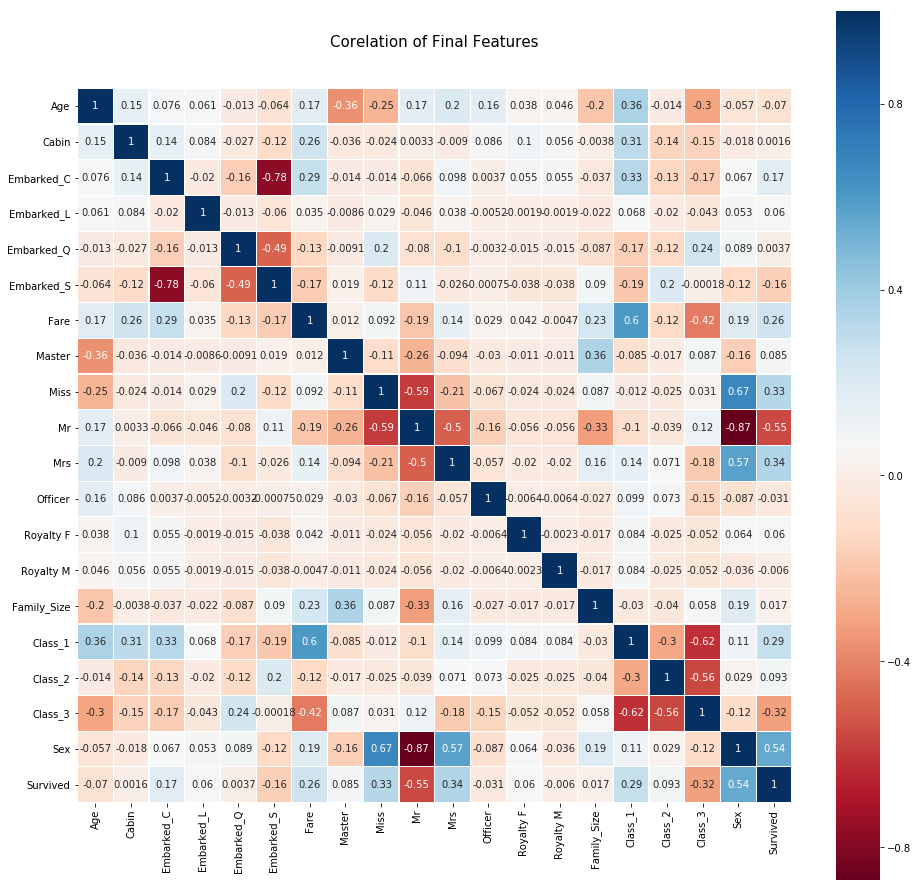

In [45]:
plt.clf()
colormap = plt.cm.RdBu
corr = full_final.corr()

fig, ax = plt.subplots(figsize=(16,16))
plt.title('Corelation of Final Features', y = 1.05, size = 15 )
sns.heatmap(corr,linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

This heatmap shows some of the correlations we have already seen. From the visualization:

- If you're an adult male your chances of survival are meager as it's negatively correlated with it.


- Similar to above, if you're a passenger having class 3 cabin, you're less likely to evacuate.


- Class 1 cabin and high fares are correlated favorably. Totally Unsurprising! 


Now comes the meaty part!!! As we've already cleaned our data, we're good to go onto modeling and prediction.

---

# 4. Modeling

## 4.1 Preparing the Data

First and foremost: we need to mould our data into a suitable format so that it gets easier to put into our Machine Learning Algorithms. Features like Age, Fare, Deck and Family Size will be normalized from 0 to 1.

In [46]:
# Applying Min-Max Normalization for Age

scaler = preprocessing.MinMaxScaler()
scaled_array = scaler.fit_transform(age_final['Age'].values.astype(float).reshape(-1,1))
age_final['Age'] = scaled_array

age_final.describe()

,Age
count,1309.000000
mean,0.372180
std,0.161383
min,0.000000
25%,0.273456
50%,0.372180
75%,0.436302
max,1.000000


In [47]:
# Applying Min-Max Normalization for Fare

scaler = preprocessing.MinMaxScaler()
scaled_array = scaler.fit_transform(fare_final['Fare'].values.astype(float).reshape(-1,1))
fare_final['Fare'] = scaled_array

fare_final.describe()

,Fare
count,1309.000000
mean,0.064988
std,0.100988
min,0.000000
25%,0.015412
50%,0.028213
75%,0.061045
max,1.000000


In [48]:
# Applying Min-Max Normalization for family size

scaler = preprocessing.MinMaxScaler()
scaled_array = scaler.fit_transform(family['Family_Size'].values.astype(float).reshape(-1,1))
family['Family_Size'] = scaled_array

family.describe()

,Family_Size
count,1309.000000
mean,0.088388
std,0.158364
min,0.000000
25%,0.000000
50%,0.000000
75%,0.100000
max,1.000000


In [49]:
# Applying Min-Max Normalization for Cabin

scaler = preprocessing.MinMaxScaler()
scaled_array = scaler.fit_transform(cabin_final['Cabin'].values.astype(float).reshape(-1,1))
cabin_final['Cabin'] = scaled_array

cabin_final.describe()

,Cabin
count,1309.000000
mean,0.505293
std,0.097874
min,0.000000
25%,0.500000
50%,0.500000
75%,0.500000
max,1.000000


In [50]:
full_final = pd.concat( [ age_final, cabin_final, embarked_final, fare_final, title, family, Pclass_final, sex_final],axis = 1)

full_final.head()

,Age,Cabin,Embarked_C,Embarked_L,Embarked_Q,Embarked_S,Fare,Master,Miss,Mr,Mrs,Officer,Royalty F,Royalty M,Family_Size,Class_1,Class_2,Class_3,Sex
0,0.273456,0.500000,0,0,0,1,0.014151,0,0,1,0,0,0,0,0.1,0,0,1,0
1,0.473882,0.571429,1,0,0,0,0.139136,0,0,0,1,0,0,0,0.1,1,0,0,1
2,0.323563,0.500000,0,0,0,1,0.015469,0,1,0,0,0,0,0,0.0,0,0,1,1
3,0.436302,0.571429,0,0,0,1,0.103644,0,0,0,1,0,0,0,0.1,1,0,0,1
4,0.436302,0.500000,0,0,0,1,0.015713,0,0,1,0,0,0,0,0.0,0,0,1,0


In [51]:
# Splitting Data into Training and Testing Data

X_training_data = full_final[:891]
y_training_data = train['Survived']
X_testing_data = full_final[891:]

---

## 4.2 Model Synopsis

For the analysis and predictive modeling, we will try out several machine learning algorithms. I'll use: Support Vector Machines(SVM), Decision Trees, Decision Trees with Adaboost,Gradient Boosting and Random Forests. 

I will determine optimum feature number, will optimize hyperparameters, and will construct learning curves for the optimum feature number for each model. Then I will feed the tuned models into an ensemble voting classifier which will wrap our models and average the predictions of the sub-models when asked to make the predictions for new data.

It'll be better to generate functions for the tasks I just mentioned above. It'll reduce the overhead for rewriting the same thing again!

In [52]:
# Generates model learning curves for a given feature number

def curve(estimator, title, X, y, n):
    pca = PCA(n_components = n)
    X_trans = pca.fit_transform(X)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X_trans, y, cv = 6, n_jobs = -1, train_sizes = np.linspace(.1, 1.0, 5))
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = "b")
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = "k")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "b", label = "Training Score")
    
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "k", label = "Cross-Validation Score")
    
    plt.legend(loc = "best")
    
    return plt

In [53]:
# Generates Training and Testing Accuracy Data for different Feature numbers, while also fitting GridSearchCV Model

def n_opt_feat(estimator, title, X, y):
    train_acc = []
    test_acc = []
    param_lst = []
    comp_lst = []
    
    for i in range(1, 18):
        pca = PCA(n_components = i)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
        
        X_train_trans = pca.fit_transform(X_train)
        X_test_trans = pca.fit_transform(X_test)
        
        estimator.fit(X_train_trans, y_train)
        
        train_score = estimator.score(X_train_trans, y_train)
        
        test_score = cross_val_score(estimator.best_estimator_, X_test_trans, y_test, cv = 6, n_jobs = -1)
        
        test_score = sum(test_score)/len(test_score)
        
        train_acc.append(train_score)
        
        test_acc.append(test_score)
        
        param_lst.append(estimator.best_params_)
        
        comp_lst.append(i)
        
        
    return train_acc, test_acc, param_lst, comp_lst

In [54]:
# Prints plot of Training and Testing Accuracy w.r.t Feature Number

def print_feat(train_acc, test_acc, comp_lst, title):
    plt.clf()
    plt.figure()
    plt.title(title)
    plt.xlabel("Features")
    plt.ylabel("Scores")
    plt.plot(comp_lst, train_acc, "o-", color = 'b', label = "Training Score")
    plt.plot(comp_lst, test_acc, "o-", color = 'k', label = "Testing Score")
    plt.legend()
    return plt

Let's start with our Models' Construction:

## 4.3 Decision Trees

Let's begin with Decision Trees:

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

<Figure size 432x288 with 0 Axes>

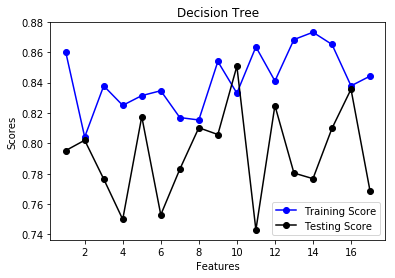

In [55]:
# Decision Trees

dt_model = DecisionTreeClassifier()
maxdep = [3, 4, 5, 6]
minsamp = [2, 3, 4, 5]

param_grid = [
    {
        'max_depth' : maxdep,
        'min_samples_split' : minsamp
    }
]

grid_dt = GridSearchCV(dt_model, cv = 6, n_jobs = -1, param_grid = param_grid, scoring = 'accuracy')

train_acc, test_acc, param_lst, comp_lst = n_opt_feat(grid_dt, 'Decision Tree', X_training_data, y_training_data)

print_feat(train_acc, test_acc, comp_lst, 'Decision Tree')


Unsurprisingly, Decision Trees overfit the Training Set. It looks like 10 features is a good point, after which Training and Testing Scores diverge.

In [56]:
# Finding Best parameters for optimum feature number

print(param_lst[comp_lst.index(10)])

{'max_depth': 3, 'min_samples_split': 2}


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

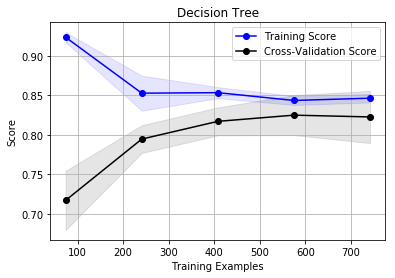

In [57]:
dt_model = DecisionTreeClassifier(min_samples_split = 2, max_depth = 3)
n_dt = 10
curve(dt_model, 'Decision Tree', X_training_data, y_training_data, n_dt)

The curve appears to converge at approximately 550 Training examples, then diverge due to overfitting.

## 4.4 Adaboost

Just the same workflow as above, with the default Decision Tree estimator:

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

<Figure size 432x288 with 0 Axes>

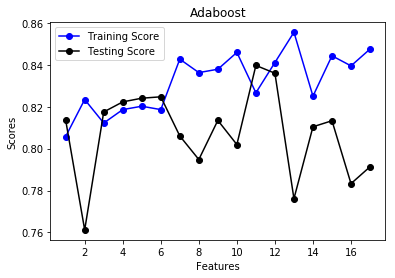

In [58]:
# Adaboost

model_adc = AdaBoostClassifier()

n_est = [30, 50, 75, 90]
learn = [ 0.03, 0.04, 0.05, 0.07, 0.1]

param_grid = [
    {
        'n_estimators' : n_est,
        'learning_rate' : learn
    }
]

grid_adc = GridSearchCV(model_adc, cv=6, n_jobs=-1, param_grid=param_grid, scoring='accuracy')
train_acc, test_acc, param_lst, comp_lst = n_opt_feat(grid_adc, 'Adaboost', X_training_data, y_training_data)
print_feat(train_acc, test_acc, comp_lst, 'Adaboost')

Adaboost looks to have the best performance at 11 features:

In [59]:
# Finding best parameters for optimum feature number

print(param_lst[comp_lst.index(11)])

{'learning_rate': 0.07, 'n_estimators': 50}


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

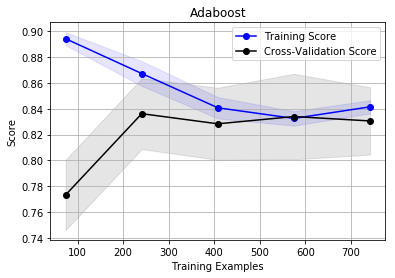

In [60]:
adc_model = AdaBoostClassifier(n_estimators=50, learning_rate=0.07)
n_ada = 11
curve(adc_model, 'Adaboost', X_training_data, y_training_data, n_ada)

Adaboost converges around 550 examples.

## 4.5 Gradient Boost

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

<Figure size 432x288 with 0 Axes>

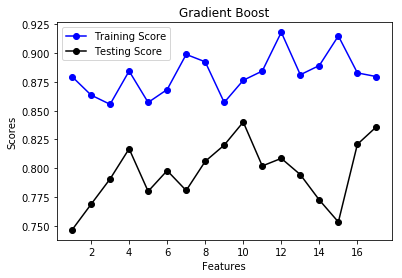

In [61]:
# Gradient Boost


model_gb = GradientBoostingClassifier()

max_dep = [3,4,5,6]
n_est = [30,40,50,80]
min_samp = [4,5,6,10]

param_grid = [
    {
        'n_estimators': n_est,
        'max_depth': max_dep,
        'min_samples_split':min_samp
    }
]

grid_gbc = GridSearchCV(model_gb, cv = 6, n_jobs = -1, param_grid = param_grid, scoring = 'accuracy')
train_acc, test_acc, param_lst, comp_lst = n_opt_feat(grid_gbc, 'Gradient Boost', X_training_data, y_training_data)
print_feat(train_acc, test_acc, comp_lst, 'Gradient Boost')

Gradient Boost performs best at 10 features.

In [62]:
# Finding best parameters for optimum feature number

print(param_lst[comp_lst.index(10)])

{'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 30}


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

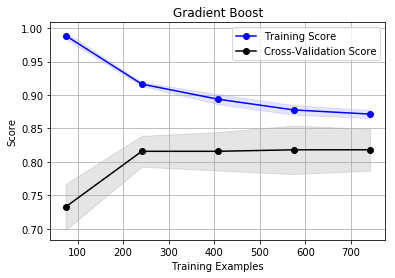

In [63]:
gbc_model = GradientBoostingClassifier(min_samples_split = 4, n_estimators = 30, max_depth = 3)
n_gbc = 10
curve(gbc_model, 'Gradient Boost', X_training_data, y_training_data, n_gbc)

It looks like Gradient Boost could use more Training examples.

## 4.6 Random Forest

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

<Figure size 432x288 with 0 Axes>

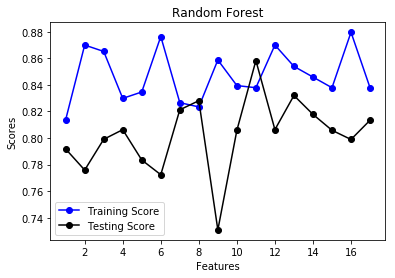

In [64]:
# Random Forest

model_rf = RandomForestClassifier()

maxdep = [3,4,5,6]
minsamp = [2,3,4,5]

param_grid = [
    {
        'max_depth': maxdep,
        'min_samples_split': minsamp
    }
]

grid_rf = GridSearchCV(model_rf, cv = 6, n_jobs = -1, param_grid = param_grid, scoring = 'accuracy')
train_acc, test_acc, param_lst, comp_lst = n_opt_feat(grid_rf, 'Random Forest', X_training_data, y_training_data)
print_feat(train_acc, test_acc, comp_lst, 'Random Forest')

11 features look promising for Random Forest..

In [65]:
# Finding best parameters for optimum feature number

print(param_lst[comp_lst.index(11)])

{'max_depth': 3, 'min_samples_split': 4}


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

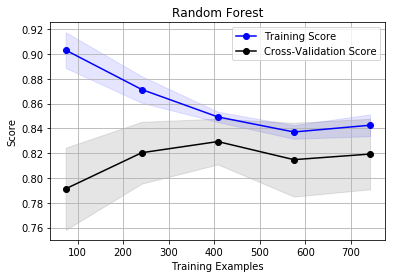

In [66]:
rf_model = RandomForestClassifier(min_samples_split = 4, max_depth = 3)
n_rf = 11
curve(rf_model, 'Random Forest', X_training_data, y_training_data, n_rf)

Random Forest appears to converge around 550 Training Examples...

## 4.7 SVM

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

<Figure size 432x288 with 0 Axes>

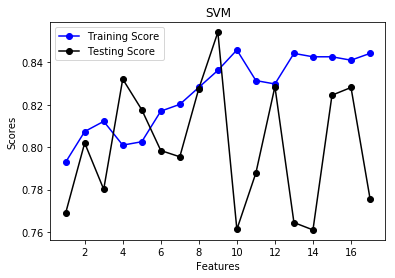

In [67]:
model_svm = svm.SVC(probability=True)

C_OPTIONS = [ 800, 900, 1000, 1100, 1200]
G_OPTIONS = [0.005,0.003, 0.001, 0.0008]

param_grid = [
    {
        'C': C_OPTIONS,
        'gamma': G_OPTIONS
    }
]

grid_svm = GridSearchCV(model_svm, cv = 6, n_jobs = -1, param_grid = param_grid, scoring = 'accuracy')
train_acc, test_acc, param_lst, comp_lst = n_opt_feat(grid_svm, 'SVM', X_training_data, y_training_data)

print_feat(train_acc, test_acc, comp_lst, 'SVM')

For SVM, it looks like 9 features is the optimum value...

In [68]:
# Finding best parameters for optimum feature number

print(param_lst[comp_lst.index(9)])

{'C': 900, 'gamma': 0.005}


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

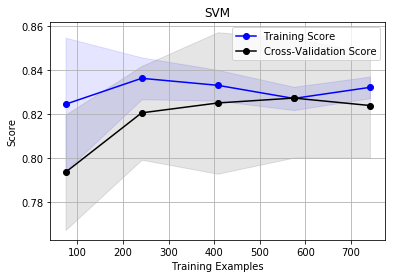

In [70]:
svm_model = svm.SVC(C=900, gamma=0.005, probability=True)
n_svm = 9
curve(svm_model, 'SVM', X_training_data, y_training_data, n_svm)

For 9 features, SVM Training and Testing converges around 550 examples. There is a descent amount of variance in the cross validation score upto 550 samples, but later it almost merges with Training Score.

---

## 4.8 Ensemble Analysis & Prediction #1

It's time to compare the models, I've just made. To keep things simple in this section, I'll train every model with 15 features. This is due to the fact that the voting classifier that will be used trains on a single dataset. 


In next section, I will use the pipeline methods to wrap feature reduction within the model before feeding it to the Voting Classifier.

In [73]:
pca = PCA(n_components = 11)

X_trans = pca.fit_transform(X_training_data)
X_test_trans = pca.transform(X_testing_data)

svm_model.fit(X_trans, y_training_data)

dt_model.fit(X_trans, y_training_data)

adc_model.fit(X_trans, y_training_data)

gbc_model.fit(X_trans, y_training_data)

rf_model.fit(X_trans, y_training_data)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

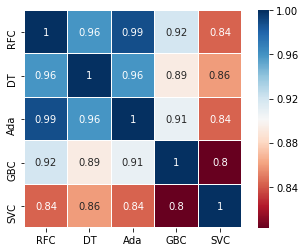

In [74]:
plt.clf()
test_Survived_RFC = pd.Series(rf_model.predict(X_test_trans), name="RFC")

test_Survived_DT = pd.Series(dt_model.predict(X_test_trans), name="DT")

test_Survived_SVMC = pd.Series(svm_model.predict(X_test_trans), name="SVC")

test_Survived_AdaC = pd.Series(adc_model.predict(X_test_trans), name="Ada")

test_Survived_GBC = pd.Series(gbc_model.predict(X_test_trans), name="GBC")


# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_DT, test_Survived_AdaC, test_Survived_GBC, test_Survived_SVMC],axis=1)


c = sns.heatmap(ensemble_results.corr(),annot=True, linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white')

Looking at the heatmap:

- It looks like Decision Tree Methods (Decision Tree, Random Forest, Adaboosted Decision Trees) are generally in agreement.


- Gradient Boost and SVM differ.


Let's feed these into a Voting Classifier, and see what happens:

In [75]:
votingC = VotingClassifier(estimators=[('rfc', rf_model), ('DT', dt_model),
('svc', svm_model),('gbc', gbc_model), ('adc',adc_model)], voting='soft', n_jobs=-1)

votingC = votingC.fit(X_trans, y_training_data)

pred = votingC.predict(X_test_trans)
pred_out_svm = pd.DataFrame(index=test['PassengerId'])
pred_out_svm['Survived'] = pred
pred_out_svm.to_csv('Voting_Prediction_1.csv')

 <a href="Voting_Prediction_1.csv"> Download File </a>

## 4.9 Pipeline Method & Prediction #2

We can even try an alternative to what we've just done. We can use the pipeline functionality in sklearn to run feature optimization & parameter optimizatin all in one go, feed the models into the voting Classifier, and optimize everything in one step. Doing this is pretty computationally expensive, but the Titanic Dataset is small enough that this isn't an issue. This will also allow each estimator to be fit to a different optimum feature number, as determined by the Grid Search. Since, we're pipelining all of this, let's add in SelectKBest as another feature selector.

In [76]:
# SVM

pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', svm.SVC(probability=True))
])

N_FEATURES_OPTIONS = [5,6,7,8,9,10,11,12,13,14,15,16]
C_OPTIONS = [ 800, 900, 1000, 1100, 1200]
G_OPTIONS = [0.005,0.003, 0.001, 0.0008]

param_grid = [
    {
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS,
        'classify__gamma': G_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS,
        'classify__gamma': G_OPTIONS
    }]
reducer_labels = ['PCA', 'KBest(chi2)']

grid_svm = GridSearchCV(pipe, cv = 6, n_jobs = -1, param_grid = param_grid, scoring = 'accuracy')

In [77]:
#Decision Tree

pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', DecisionTreeClassifier())
])

N_FEATURES_OPTIONS = [5,6,7,8,9,10,11,12,13,14,15,16]
maxdep = [3,4,5,6]
minsamp = [2,3,4,5]

param_grid = [
    {
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__max_depth': maxdep,
        'classify__min_samples_split': minsamp
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__max_depth': maxdep,
        'classify__min_samples_split': minsamp
    }]

reducer_labels = ['PCA', 'KBest(chi2)']

grid_dt = GridSearchCV(pipe, cv = 6, n_jobs = -1, param_grid = param_grid, scoring = 'accuracy')

In [78]:
#Adaboost

pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', AdaBoostClassifier())
])

N_FEATURES_OPTIONS = [5,6,7,8,9,10,11,12,13,14,15,16]
n_est = [30, 50,75,90]
learn = [0.03, 0.04, 0.05, 0.07, 0.1]

param_grid = [
    {
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__n_estimators': n_est,
        'classify__learning_rate': learn
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__n_estimators': n_est,
        'classify__learning_rate': learn
    }]
reducer_labels = ['PCA', 'KBest(chi2)']

grid_adc = GridSearchCV(pipe, cv = 6, n_jobs = -1, param_grid = param_grid, scoring = 'accuracy')

In [79]:
#Gradient boost
pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', GradientBoostingClassifier())
])

N_FEATURES_OPTIONS = [5,6,7,8,9,10,11,12,13,14,15,16]
max_dep = [3,4,5,6]
n_est = [30,40,50,80]
min_samp = [4,5,6,10]

param_grid = [
    {
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__n_estimators': n_est,
        'classify__max_depth': max_dep,
        'classify__min_samples_split':min_samp
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__n_estimators': n_est,
        'classify__max_depth': max_dep,
        'classify__min_samples_split':min_samp
    }]
reducer_labels = ['PCA', 'KBest(chi2)']

grid_gbc = GridSearchCV(pipe, cv = 6, n_jobs = -1, param_grid = param_grid, scoring = 'accuracy')

In [80]:
#Random Forest

pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', RandomForestClassifier())
])

N_FEATURES_OPTIONS = [5,6,7,8,9,10,11,12,13,14,15,16]
maxdep = [3,4,5,6]
minsamp = [2,3,4,5]
param_grid = [
    {
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__max_depth': maxdep,
        'classify__min_samples_split': minsamp
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__max_depth': maxdep,
        'classify__min_samples_split': minsamp
    }]
reducer_labels = ['PCA', 'KBest(chi2)']

grid_rf = GridSearchCV(pipe, cv = 6, n_jobs = -1, param_grid = param_grid, scoring = 'accuracy')

In [ ]:
estimators = [('rfc', grid_rf), ('DT', grid_dt), ('svc', grid_svm), ('gbc',grid_gbc), ('adc',grid_adc)]

votingC = VotingClassifier(estimators, voting = 'soft')

votingC = votingC.fit(X_training_data, y_training_data)

for i in votingC.estimators_:
    print('\n', i.best_estimator_)
    
pred = votingC.predict(X_testing_data)
pred_out_svm = pd.DataFrame(index=test['PassengerId'])
pred_out_svm['Survived'] = pred
pred_out_svm.to_csv('Voting_Prediction_2.csv')

 <a href="Voting_Prediction_2.csv"> Download File </a>

# 5. Predictions

## 5.1 Model Predictions

Two prdictions were submitted. One for the initial method of tuning each estimator, and one for the pipeline method.

Prediction 1 scored 0.78947 and Prediction 2 scored 0.79904.

## 5.2 Analysis & Conclusions

Looking at the two predictions it looks like the accuracy benefitted from each model being allowed to choose a feature size, rather than setting a single feature size for all models.

This has been my first machine learning project and writeup. Lot of hours have been put into making this easily understandable. It was indeed a great experience!